# Announcement-on-ML
<a href='http://www.kgptalkie.com' target="_blank"> <img src='https://github.com/laxmimerit/Important-Announcement-on-ML/raw/master/kgptalkie_strips.png'/></a>

# ML Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Deep Learning for Beginners with Python**](https://bit.ly/dl-with-python) | Neural Networks, TensorFlow, ANN, CNN, RNN, LSTM, Transfer Learning and Much More. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |


# Sentiment Analysis with DistilBERT using Hugging Face | NLP with Hugging Face Tutorials


**GITHUB REPO:**

https://github.com/laxmimerit/NLP-Tutorials-with-HuggingFace

NLP Playlist: https://www.youtube.com/watch?v=NLvQ5oj-Sg4&list=PLc2rvfiptPSTGfTp0nhC71ksTY1p5ooCW

## What is Sentiment Analysis?
Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

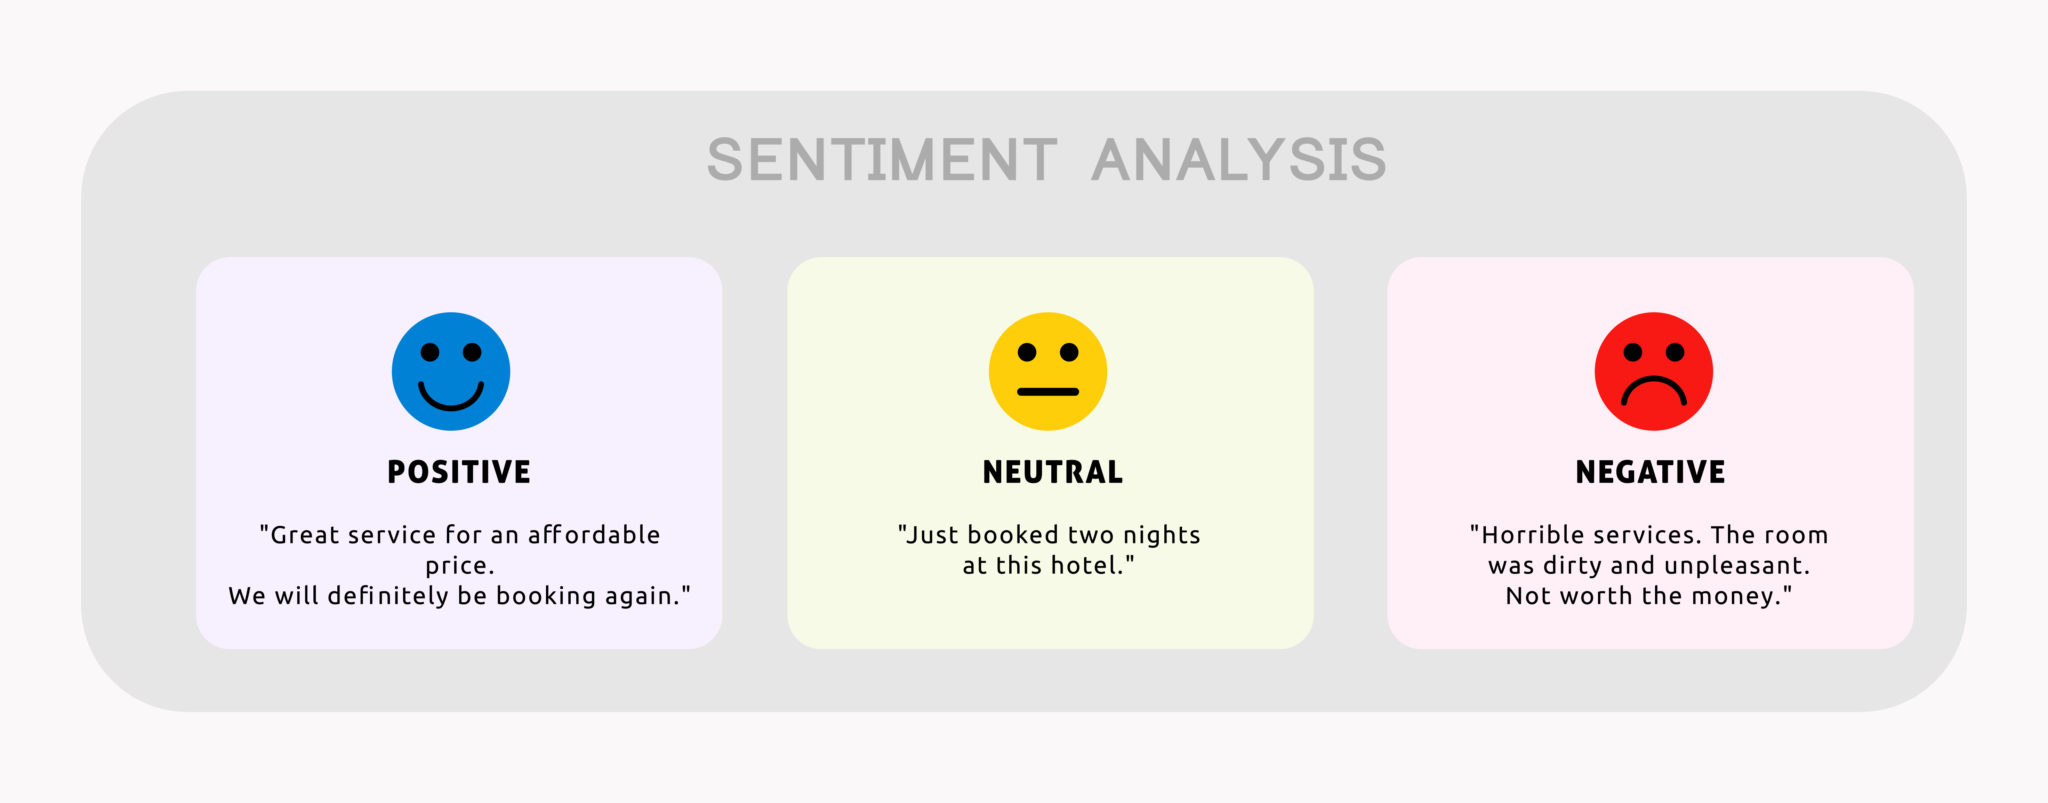

### Transformers Architecture
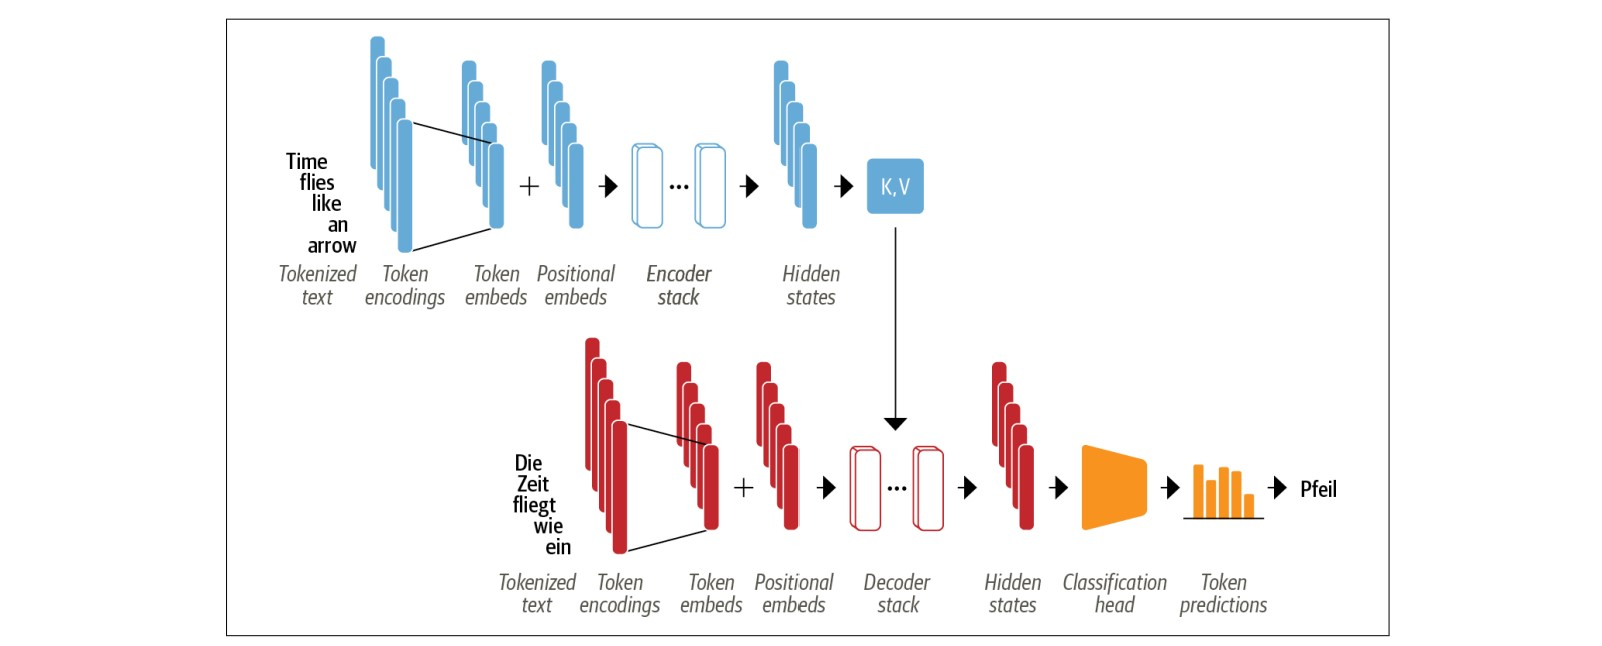

## DistilBERT
- The IMDB dataset contains 25,000 movie reviews labeled by sentiment for training a model and 25,000 movie reviews for testing it.

- DistilBERT is a smaller, faster and cheaper version of BERT. It has 40% smaller than BERT and runs 60% faster while preserving over 95% of BERT’s performance.

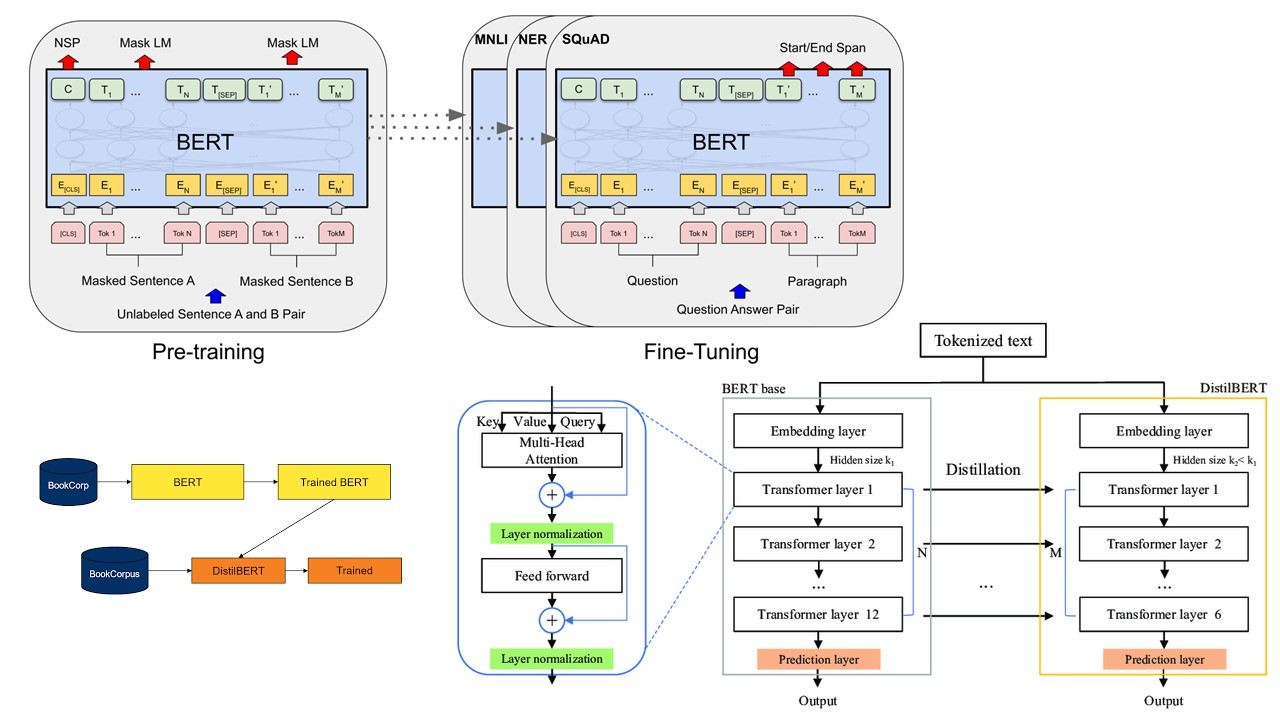

**Introduction to DistilBERT:** DistilBERT, short for "Distill and BERT," is a compact version of the renowned BERT (Bidirectional Encoder Representations from Transformers) model.

**Model Architecture:** It reduces the number of layers and attention heads, resulting in a smaller and faster model.

**Parameter Reduction:** One of DistilBERT's key features is its parameter reduction strategy, achieved by distillation. This involves training the model on a combination of teacher (BERT) and student (DistilBERT).

**Efficiency and Speed:** By reducing the model's size and complexity, DistilBERT achieves a significant speedup during both training and inference.

# Coding

https://github.com/laxmimerit/preprocess_kgptalkie

In [ ]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob
!pip install mlxtend
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

In [3]:
# sentiment analysis with the pipeline
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

data = ['i love you', 'i hate you']
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

## Data Loading and Preprocessing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocess_kgptalkie as ps

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/IMDB-Dataset.csv")
df = df.sample(10_000)
df.head()

,review,sentiment
31181,Scientist working frantically in seclusion fin...,positive
38043,POSSIBLE SPOILERS<br /><br />No one is likely ...,positive
31171,My ex wife and I saw and were intrigued by the...,positive
3689,The other lowest-rating reviewers have summed ...,negative
11134,I found it almost impossible to empathize with...,negative


In [10]:
df.shape
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [11]:
# preprocessing
df['word_counts'] = df['review'].apply(lambda x: ps.get_wordcounts(x))
df['char_counts'] = df['review'].apply(lambda x: ps.get_charcounts(x))
df['avg_wordlength'] = df['review'].apply(lambda x: ps.get_avg_wordlength(x))
df['stopwords_counts'] = df['review'].apply(lambda x: ps.get_stopwords_counts(x))

In [13]:
df.head()

df['review'] = df['review'].str.lower()
df['review'] = df['review'].apply(lambda x: ps.remove_html_tags(x))

/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


<Axes: >

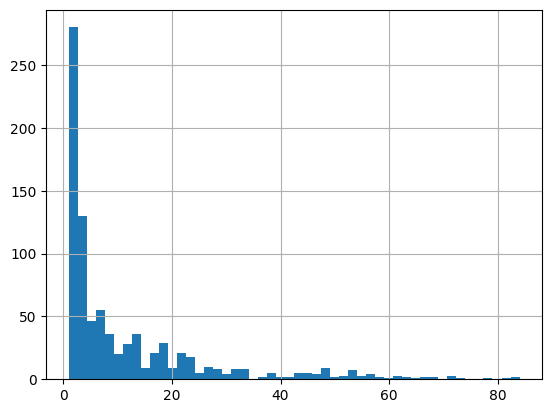

In [16]:
df['word_counts'].value_counts().hist(bins=50)

## Data Preparation for ML

In [17]:
# custom dataset -> evaluation/compute metrics -> training arguments -> trainer -> training -> testing

In [18]:
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

In [66]:
class CustomDataset(Dataset):
  def __init__(self, texts, labels, tokenizer, max_len=512):
    self.texts = texts
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    text = str(self.texts[idx])
    label = torch.tensor(self.labels[idx])

    encoding = self.tokenizer(text, truncation=True, padding="max_length",
                              max_length=self.max_len)

    return {
        'input_ids': encoding['input_ids'],
        'attention_mask': encoding['attention_mask'],
        'labels': label
    }


In [67]:
# prepare tokenizer and model
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = 'distilbert-base-uncased'
device = "cuda"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [68]:
X = df['review'].tolist()

label2id = {'positive': 1, 'negative': 0}
id2label = {1: 'positive', 0: 'negative'}

y = df['sentiment'].map(label2id).tolist()

dataset = CustomDataset(X, y, tokenizer)

In [69]:
dataset[0].keys()

dict_keys(['input_ids', 'attention_mask', 'labels'])

In [70]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

In [71]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(example):
  labels = example.label_ids
  preds = example.predictions.argmax(-1)

  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)

  return {'accuracy': acc, "f1": f1}

In [75]:
from transformers import Trainer, TrainingArguments
batch_size = 16
model_name = "distilbert_finetuned_setiment"

args = TrainingArguments(
    output_dir = "output",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size = batch_size,
    learning_rate = 2e-5,
    num_train_epochs = 1,
    evaluation_strategy = 'epoch'
)

In [76]:
trainer = Trainer(model=model,
                  args=args,
                  train_dataset = train_dataset,
                  eval_dataset = test_dataset,
                  compute_metrics=compute_metrics,
                  tokenizer = tokenizer)

In [77]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.247500,0.234023,0.906500,0.906490


TrainOutput(global_step=500, training_loss=0.24754965209960939, metrics={'train_runtime': 415.3863, 'train_samples_per_second': 19.259, 'train_steps_per_second': 1.204, 'total_flos': 1059739189248000.0, 'train_loss': 0.24754965209960939, 'epoch': 1.0})

In [78]:
trainer.save_model(model_name)

## Model Testing

In [80]:
text = "i love this product"
pipe = pipeline('text-classification', model_name)
pipe(text)

[{'label': 'LABEL_1', 'score': 0.9788889288902283}]

In [81]:
id2label

{1: 'positive', 0: 'negative'}

In [82]:


tok = AutoTokenizer.from_pretrained(model_name)
mod = AutoModelForSequenceClassification.from_pretrained(model_name)

In [86]:
def get_prediction(text):
  input_ids = tok.encode(text, return_tensors='pt')
  output = mod(input_ids)

  preds = torch.nn.functional.softmax(output.logits, dim=-1)

  prob = torch.max(preds).item()

  idx = torch.argmax(preds).item()
  sentiment = id2label[idx]

  return {'sentiment':sentiment, 'prob':prob}

In [87]:
text = "i love this product"
get_prediction(text)

{'sentiment': 'positive', 'prob': 0.9788889288902283}

In [88]:
text = "i hate this product"
get_prediction(text)

{'sentiment': 'negative', 'prob': 0.9801149964332581}